<h1 align=center><font size = 5> Define the best location (Neighborhoods) in Fort Lauderdale City for a Coffee Shop To Go </font></h1>

## Table of contents
* [Introduction/ Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction/ Business Problem <a name="introduction"></a>

### 1.1 Background

We live in a world where everyday people generate data of his behavior and there are a lot of machines that recompile that information. Also, there are a business that uses lots of data available in their systems for making the wiser decision possible for invest their money.
In this world of velocity of information, people try hard to reduce the time of the unnecessary activities in their routine, like having the coffee cup that keep you going all day. Thinking in this, we could think that people that has no public transports, and drives long distances to their home to their jobs, or people who travels for shopping or entertainment and wants to improve the use of their time would be interested in a modality of coffee to go, like the auto-services of the junk food.

### 1.2. Problem

Where is the best place to locate a coffee shop? When you are trying to open a new local just the information that you can recompile inside the business is not enough because there are some geographical variables that can make a difference in choosing the best location and make a positive impact on the business on the short, middle and long ride. The idea of a good location depends of the objectives of the owner(s), but we must be near of the clients, be accessible to the potential clients, near of the raw material supplier because we could also need to reduce logistic cots.

### 1.3. Interests

People that can be interested in this business idea is the people that want to initiate in their own coffee shop or someone who is looking to open a new local or to relocate the one that is actually working but needs to improve the affluence of people or reduce some logistic costs at Fort Lauderdale - Florida.


## 2. Data <a name="data"></a>

### 2.1. Data Sources

Most of the venues like the coffee shop at the United States has their location and ranking at the Foursquare application, the Fort Lauderdale at the Florida State, has a lot of traffic of tourists for entertainment or for shopping, but there is also the reality of the people who lives there and uses their own cars for their rides to the jobs at the morning.
Other web information I'll be using is the location of the banks or other business offices, and some residential neighborhoods that can help to make clear where are middle points that we can identify for the location we are seeking. There could be also some points of interest like the airport or the rental cars offices where some journeys begin.

The principal links to the web information that was used at this project:

Foursquare: https://developer.foursquare.com/places

Fort Lauderdale Site Address: http://data-fortlauderdale.opendata.arcgis.com/datasets/site-address-points-address

Fort Lauderdale Zoning Districts: http://data-fortlauderdale.opendata.arcgis.com/datasets/zoning-districts-land-use-planning?orderBy=ZONEDESC

Fort Lauderdale Airport’s Traffic: https://es.wikipedia.org/wiki/Aeropuerto_Internacional_de_Fort_Lauderdale-Hollywood#Estad%C3%ADsticas


## 3. Methodology <a name="methodology"></a>

The idea of finding a good location needs to considerate that there are many possible places to choose, and most be some features in the selected location.

The Machine Learning choose to perform the principal analysis is Clustering with K-means, because we need to use the geographic information of all the neighborhoods at the Fort Lauderdale City to find out which ones are more similar at the venues and the kind of possible clients at that location.
Finding a cluster of neighborhoods with similar characteristics gives us the opportunity of choosing between them one that satisfy the objectives of the business and not only the potential clients.

## 4. Analysis  <a name="analysis"></a>

It's possible to visualize that there is a hug number of tourists using the airport of Fort Lauderdale, and how is the tendency thru the years. It's also possible using the maps to visualize where are some important points at the tourist routs as the rental cars, the marina, the ferry, where are some places at the surroundings that call the attention of many tourist as the Orlando Outlets Theme Parks, Outlets, etc, this places demand that the tourist uses a particular car for executing the leisure plan.

In the other hand is very useful the use of the Foursquare API venues, to identify the places with more similar venues, so we can find the features that can permit use suggest a neighborhood that could host the coffee shop.

Geting started with the job at the notebook to show you, how was the analysis performed.
The first step, get the data and start exploring it, it was necessary to download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Download and Explore Dataset

Fort Lauderdale has a total of 89 neighborhoods, I couldn't find the information required as a datset, so I used ARCGIS to identify the latitude and longitude of each neighborhood and complete it as an excel file.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_02bcfaa4d8034c2791ebccc84915cc68 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2FJTZOJBN6J37R9TWkYLSQcWsYsnFwcu4-wQo01ha0hh',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_02bcfaa4d8034c2791ebccc84915cc68.get_object(Bucket='coffeeshoplocation-donotdelete-pr-xwk4o25mvjk04s',Key='Neighborhoods of Fort Lauderdale Florida USA.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()

,Neighborhood,Latitude,Longitude
0,Bal Harbour,26.151898,-80.117001
1,Bay Colony,26.207614,-80.102679
2,Bay Colony Club,26.203269,-80.102478
3,Bermuda Riviera,26.176037,-80.100104
4,Beverly Heights,26.120406,-80.133434


In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_02bcfaa4d8034c2791ebccc84915cc68 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2FJTZOJBN6J37R9TWkYLSQcWsYsnFwcu4-wQo01ha0hh',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_02bcfaa4d8034c2791ebccc84915cc68.get_object(Bucket='coffeeshoplocation-donotdelete-pr-xwk4o25mvjk04s',Key='Site_Address_Points__Address.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14,20,25,26,32,33,34,38,39,40,41,44,45,46,47,48,54,56,67,68,69,86,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,X,Y,OBJECTID,SITEADDID,ADDPTKEY,LANDRECORDID,FOLIO,PARCELID,CITYPARCELID,RECORDTYPE,PREADDRNUM,ADDRNUMSUF,ADDRNUM,ADDRRANGE,HOUSENUM,PREFDIR,PREFTYPE,STREETNAME,STREETPSTL,SUFFTYPE,SUFFDIR,UNITID,UNITTYPE,ALTUNITTYPE,ALTUNITID,BLDGNUM,FULLNAME,SITEADDRESS,SITEADDRPSTL,PLACENAME,COUNTY,MUNICIPALITY,MUNCODE,ADDRSTATE,ADDRZIP,FULLADDR,FULLADDRPSTL,ADDRSOURCE,BLDGUSE,BLOCK,MAPBOOK,MAPPAGE,CENSUSTRACT,PARCELSTATUS,PARCELPARENT,TOWNSHIP,RANGE,SECTION,LOT,ESN,PSAP,MSAG,USNGCOORD,ADDRCLASS,POINTTYPE,CAPTUREMETH,STATUS,CNVYNAME,CNTYGISSQFT,CITYGISAREASQFT,PRPRTYDSCRP,OWNERNME1,OWNERNME2,OWNERS,PSTLADDRESS,PSTLCITY,PSTLSTATE,OWNERCOUNTRY,PSTLZIP5,PSTLZIP4,OWNERZIP,PSTFULLADDR,MILLAGECODE,USECD,USEDSCRP,DORUSEDETAILS,PROPYEARBUILT,TOTEXEMAMNT,LANDVALUE,BLDGVALUE,CNTASSDVAL,LATITUDE,LONGITUDE,SPCSXCOORD,SPCSYCOORD,LOCALELECTDIST,NEIGHBORASSN,CODEAREA,FLEXZONE,FEMAFLOODZONE,BASEFLOODELEV,Notes,created_user,created_date,last_edited_user,last_edited_date,GlobalID
0,912343.96895,677667.746084,1001,NaN,1001,NaN,494112BJ1740,9112BJ1740,NaN,Condo Unit,NaN,NaN,NaN,NaN,5740,NaN,NaN,ROCK ISLAND,ROCK ISLAND,RD,NaN,274,NaN,NaN,NaN,NaN,NaN,5740 ROCK ISLAND RD #274,5740 ROCK ISLAND RD #274,NaN,NaN,TAMARAC,TM,NaN,33319,"5740 ROCK ISLAND RD #274, TAMARAC, FL 33319","5740 ROCK ISLAND RD #274, TAMARAC, FL 33319",Condo Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEXINGTON ON THE GREEN CONDO,0.0,657275.0,LEXINGTON ON THE GREEN CONDO UNIT 274 BLDG 7 A...,"GONZALEZ,WILFRED",NaN,"GONZALEZ,WILFRED",4428 NW 22 CT,MIAMI,FL,NaN,33142,4668,33142-4668,"4428 NW 22 CT, MIAMI, FL 33142-4668",3112.0,4.0,Residential,04 - Residential - Condominium,1988.0,0.0,7220.0,64940.0,72160.0,26.195912,-80.218757,912343.96895,677667.746084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{21DBC321-C2D4-4AFD-ACC8-DFC21C8D255F}
1,912343.96895,677667.746084,1002,NaN,1002,NaN,494112BJ1530,9112BJ1530,NaN,Condo Unit,NaN,NaN,NaN,NaN,5672,NaN,NaN,ROCK ISLAND,ROCK ISLAND,RD,NaN,253,NaN,NaN,NaN,NaN,NaN,5672 ROCK ISLAND RD #253,5672 ROCK ISLAND RD #253,NaN,NaN,TAMARAC,TM,NaN,33319,"5672 ROCK ISLAND RD #253, TAMARAC, FL 33319","5672 ROCK ISLAND RD #253, TAMARAC, FL 33319",Condo Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEXINGTON ON THE GREEN CONDO,0.0,657275.0,LEXINGTON ON THE GREEN CONDO UNIT 253 BLDG 6 A...,JSJ PROPERTIES LLC,NaN,JSJ PROPERTIES LLC,PO BOX 460205,FORT LAUDERDALE,FL,NaN,33346,NaN,33346,"PO BOX 460205, FORT LAUDERDALE, FL 33346",3112.0,4.0,Residential,04 - Residential - Condominium,1988.0,0.0,10700.0,96270.0,106970.0,26.195912,-80.218757,912343.96895,677667.746084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{82B78D5C-9C1A-45C8-8044-1F7887803576}
2,912343.96895,677667.746084,1003,NaN,1003,NaN,494112BJ1540,9112BJ1540,NaN,Condo Unit,NaN,NaN,NaN,NaN,5672,NaN,NaN,ROCK ISLAND,ROCK ISLAND,RD,NaN,254,NaN,NaN,NaN,NaN,NaN,5672 ROCK ISLAND RD #254,5672 ROCK ISLAND RD #254,NaN,NaN,TAMARAC,TM,NaN,33319,"5672 ROCK ISLAND RD #254, TAMARAC, FL 33319","5672 ROCK ISLAND RD #254, TAMARAC, FL 33319",Condo Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEXINGTON ON THE GREEN CONDO,0.0,657275.0,LEXINGTON ON THE GREEN CONDO UNIT 254 BLDG 6 A...,LEXINGTON 5672-254 LLC,NaN,LEXINGTON 5672-254 LLC,6020 NW 99 AVE STE 213,DORAL,FL,NaN,33178,NaN,33178,"6020 NW 99 AVE STE 213, DORAL, FL 33178",3112.0,4.0,Residential,04 - Residential - Condominium,1988.0,0.0,7220.0,64940.0,72160.0,26.195912,-80.218757,912343.96895,677667.746084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{4CF2EE87-169B-4488-99EC-0ECD1452E203}
3,912343.96895,677667.746084,1004,NaN,1004,NaN,494112BJ1550,9112BJ1550,NaN,Condo Unit,NaN,NaN,NaN,NaN,5672,NaN,NaN,ROCK ISLAND,ROCK ISLAND,RD,NaN,255,NaN,NaN,NaN,NaN,NaN,5672 ROCK ISLAND RD #255,5672 ROCK ISLAND RD #255,NaN,NaN,TAMARAC,TM,NaN,33319,"5672 ROCK ISLAND RD #255, TAMARAC, FL 33319","5672 ROCK ISLAND RD #255, TAMARAC, FL 33319",Condo Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:

body = client_02bcfaa4d8034c2791ebccc84915cc68.get_object(Bucket='coffeeshoplocation-donotdelete-pr-xwk4o25mvjk04s',Key='Trafico Anual Pasajeros Fort Lauderdale Airport.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_excel(body)
df_data_3.head()


,Año,Pasajeros
0,1957,41335
1,1958,48568
2,1959,134773
3,1960,195907
4,1961,213289


### Tourists of the Fort Lauderdale's Airport

At the South Florida there are two main international airports, one is in Miami and the second is at Fort Lauderdale, what neighborhood is the nearest to Palm Beach and Orlando. 

We can see for the statistics of annual traffic of the airport, the tourists and local visitor are growing in number.

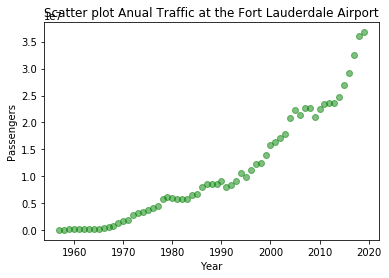

In [45]:
import numpy as np
import matplotlib.pyplot as plt

año = df_data_3['Año']
pas = df_data_3['Pasajeros']

# Plot
plt.scatter(año, pas, c='green', alpha=0.5)
plt.title('Scatter plot Anual Traffic at the Fort Lauderdale Airport')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

### Data Cleansing and pre-process data features

In [46]:
columns = ['USEDSCRP','DORUSEDETAILS', 'PSTLCITY', 'PSTLSTATE', 'CNVYNAME', 'RECORDTYPE', 'LATITUDE', 'LONGITUDE']

In [47]:
df_sites = df_data_1[columns]

In [48]:
df_sites.describe(include='all')

,USEDSCRP,DORUSEDETAILS,PSTLCITY,PSTLSTATE,CNVYNAME,RECORDTYPE,LATITUDE,LONGITUDE
count,221810,221809,221489,221489,221489,228789,228789.000000,228789.000000
unique,8,66,6624,133,143000,2,NaN,NaN
top,Residential,01 - Residential - Single Family,FORT LAUDERDALE,FL,WASHINGTON PARK FOURTH ADD 22-44 B,Parcel,NaN,NaN
freq,184013,80598,86362,183296,644,140599,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,26.159040,-80.150483
std,NaN,NaN,NaN,NaN,NaN,NaN,0.040880,0.037321
min,NaN,NaN,NaN,NaN,NaN,NaN,26.058997,-80.258621
25%,NaN,NaN,NaN,NaN,NaN,NaN,26.125593,-80.182397
50%,NaN,NaN,NaN,NaN,NaN,NaN,26.160150,-80.146054
75%,NaN,NaN,NaN,NaN,NaN,NaN,26.192707,-80.118374


In [49]:
df_sites_FortLauderdale = df_sites[df_sites['PSTLCITY'] == 'FORT LAUDERDALE']
df_sites_FortLauderdale.head()

,USEDSCRP,DORUSEDETAILS,PSTLCITY,PSTLSTATE,CNVYNAME,RECORDTYPE,LATITUDE,LONGITUDE
1,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,LEXINGTON ON THE GREEN CONDO,Condo Unit,26.195912,-80.218757
3,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,LEXINGTON ON THE GREEN CONDO,Condo Unit,26.195912,-80.218757
8,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,LEXINGTON ON THE GREEN CONDO,Condo Unit,26.195912,-80.218757
9,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,LEXINGTON ON THE GREEN CONDO,Condo Unit,26.195912,-80.218757
10,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,LEXINGTON ON THE GREEN CONDO,Condo Unit,26.195912,-80.218757


In [50]:
df_sites_FortLauderdale.describe(include='all')

,USEDSCRP,DORUSEDETAILS,PSTLCITY,PSTLSTATE,CNVYNAME,RECORDTYPE,LATITUDE,LONGITUDE
count,86362,86361,86362,86362,86362,86350,86350.000000,86350.000000
unique,7,60,1,2,52423,2,NaN,NaN
top,Residential,01 - Residential - Single Family,FORT LAUDERDALE,FL,CORAL RIDGE GALT ADD NO 1 31-37 B,Parcel,NaN,NaN
freq,66889,34907,86362,86361,503,63153,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,26.141076,-80.142907
std,NaN,NaN,NaN,NaN,NaN,NaN,0.036998,0.030599
min,NaN,NaN,NaN,NaN,NaN,NaN,26.058997,-80.228124
25%,NaN,NaN,NaN,NaN,NaN,NaN,26.111727,-80.165678
50%,NaN,NaN,NaN,NaN,NaN,NaN,26.134348,-80.139704
75%,NaN,NaN,NaN,NaN,NaN,NaN,26.169887,-80.115178


In [51]:
df_sites_FortLauderdale.shape

(86362, 8)

In [53]:
df_sites_FortLauderdale.drop_duplicates(['CNVYNAME', 'LATITUDE', 'LONGITUDE'], keep='last',inplace=True)
df_sites_FortLauderdale.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,USEDSCRP,DORUSEDETAILS,PSTLCITY,PSTLSTATE,CNVYNAME,RECORDTYPE,LATITUDE,LONGITUDE
167,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT E BLDG 5,Condo Unit,26.190947,-80.207801
172,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT F BLDG 27,Condo Unit,26.190947,-80.207801
173,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT E BLDG 28,Condo Unit,26.190947,-80.207801
181,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT G BLDG 5,Condo Unit,26.190947,-80.207801
220,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT B BLDG 15,Condo Unit,26.190947,-80.207801


In [54]:
df_sites_FortLauderdale.shape

(68235, 8)

In [55]:
df_sites_FortLauderdale.dropna(subset=['CNVYNAME', 'LATITUDE', 'LONGITUDE'], inplace=True)
df_sites_FortLauderdale.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,USEDSCRP,DORUSEDETAILS,PSTLCITY,PSTLSTATE,CNVYNAME,RECORDTYPE,LATITUDE,LONGITUDE
167,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT E BLDG 5,Condo Unit,26.190947,-80.207801
172,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT F BLDG 27,Condo Unit,26.190947,-80.207801
173,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT E BLDG 28,Condo Unit,26.190947,-80.207801
181,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT G BLDG 5,Condo Unit,26.190947,-80.207801
220,Residential,04 - Residential - Condominium,FORT LAUDERDALE,FL,ARBOR KEYS CONDO UNIT B BLDG 15,Condo Unit,26.190947,-80.207801


In [56]:
df_sites_FortLauderdale.shape

(68223, 8)

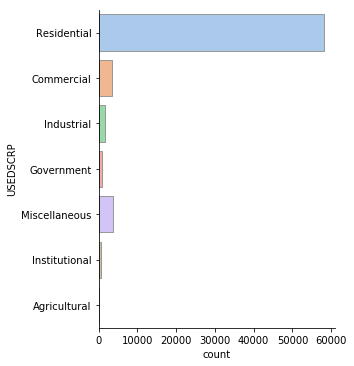

In [62]:
import seaborn as sns
sns.catplot(y="USEDSCRP", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_sites_FortLauderdale);

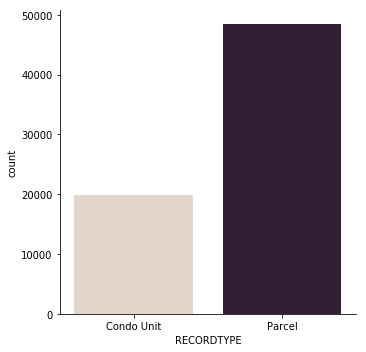

In [60]:
sns.catplot(x="RECORDTYPE", kind="count", palette="ch:.25", data=df_sites_FortLauderdale);

In [5]:
neighborhoods = df_data_0
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Bal Harbour,26.151898,-80.117001
1,Bay Colony,26.207614,-80.102679
2,Bay Colony Club,26.203269,-80.102478
3,Bermuda Riviera,26.176037,-80.100104
4,Beverly Heights,26.120406,-80.133434


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [6]:
print('The dataframe has {} neighborhoods.'.format(
        len(neighborhoods['Neighborhood'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 89 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Fort Lauderdale City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [7]:
address = 'Fort Lauderdale City, FL'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fort Lauderdale City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Fort Lauderdale City are 26.1223084, -80.1433786.


#### Create a map of Fort Lauderdale with neighborhoods superimposed on top.

In [8]:
# create map of New York using latitude and longitude values
map_fortlauderdale = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fortlauderdale)  
    
map_fortlauderdale

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = 'RKFKHTYJCQWSO5URSGQGUCXSPZQCOM4VB0ATQ5OY5T02PRKL' # your Foursquare ID
CLIENT_SECRET = 'K1ENWEUQ4D5ALIAI4DYOVPJX2ZKD1JEMO0VRLVJHW4DSJZRW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RKFKHTYJCQWSO5URSGQGUCXSPZQCOM4VB0ATQ5OY5T02PRKL
CLIENT_SECRET:K1ENWEUQ4D5ALIAI4DYOVPJX2ZKD1JEMO0VRLVJHW4DSJZRW


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [10]:
neighborhoods.loc[0, 'Neighborhood']

'Bal Harbour'

Get the neighborhood's latitude and longitude values.

In [11]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bal Harbour are 26.151898, -80.117001.


#### Now, let's get the top 100 venues that are in Bal Harbour Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [12]:
# type your answer here
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    LIMIT)
url




'https://api.foursquare.com/v2/venues/explore?&client_id=RKFKHTYJCQWSO5URSGQGUCXSPZQCOM4VB0ATQ5OY5T02PRKL&client_secret=K1ENWEUQ4D5ALIAI4DYOVPJX2ZKD1JEMO0VRLVJHW4DSJZRW&v=20180605&ll=26.151898,-80.117001&radius=500&limit=100'

Send the GET request and examine the resutls

In [13]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5dced8ad1ab4001bf7fc8f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Fort Lauderdale',
  'headerFullLocation': 'Fort Lauderdale',
  'headerLocationGranularity': 'city',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': 26.156398004500005,
    'lng': -80.11199714662033},
   'sw': {'lat': 26.147397995499993, 'lng': -80.12200485337968}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a70defcf964a520a5d81fe3',
       'name': 'Whole Foods Market',
       'location': {'address': '2000 N Federal Hwy',
        'crossStreet': 'btwn. NE 19th St. & NE 21st St.',
        'lat': 26.15368454738101,
    

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [15]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Whole Foods Market,Grocery Store,26.153685,-80.117884
1,Ulta Beauty,Cosmetics Shop,26.151488,-80.118470
2,Chipotle Mexican Grill,Mexican Restaurant,26.150565,-80.118887
3,DSW Designer Shoe Warehouse,Shoe Store,26.150601,-80.118325
4,Panera Bread,Bakery,26.151740,-80.118146


And how many venues were returned by Foursquare?

In [16]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

47 venues were returned by Foursquare.


### Explore Neighborhoods in Fort Lauderdale

#### Let's create a function to repeat the same process to all the neighborhoods in Fort Lauderdale

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *fortlauderdale_venues*.

In [18]:
fortlauderdale_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )



Bal Harbour
Bay Colony
Bay Colony Club
Bermuda Riviera
Beverly Heights
Birch Park-Finger Streets
Boulevard Park Isles
Breakwater Surf Club
Central Beach
Chula Vista Isles
City View
Colee Hammock
Coral Ridge
Coral Ridge Country Club Estates
Coral Ridge Isles
Coral Shores
Croissant Park
Dillard Park
Dolphin Isles
Dorsey Riverbend
Downtown Fort Lauderdale
Durrs
Edgewood
Flagler Village
Flamingo Park
Galt Ocean Mile
Golden Heights
Harbor Beach
Harbor Drive
Harbordale
Harbour Inlet
Harbour Isles
Hendricks and Venice Isles
Himmarshee Village (Historic District)
Home Beautiful Park
Idlewyld
Imperial Point
Knoll Ridge
Lake Aire-Palm View
Lake Estates
Lake Ridge
Landings
Las Olas Isles
Lauderdale Beach
Lauderdale Harbours
Lauderdale Isles
Lauderdale Manors
Lauderdale West
Laudergate Isles
Lofts of Palm Aire Village
Melrose Manors
Melrose Park
Middle River Terrace
Montego Bay
Navarro Isle
North Beach Island
North Golf Estates
Nurmi Isles
Oak River
Palm Aire Village East
Palm Aire Village West
Po

#### Let's check the size of the resulting dataframe

In [19]:
print(fortlauderdale_venues.shape)
fortlauderdale_venues.head()

(1001, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bal Harbour,26.151898,-80.117001,Whole Foods Market,26.153685,-80.117884,Grocery Store
1,Bal Harbour,26.151898,-80.117001,Ulta Beauty,26.151488,-80.118470,Cosmetics Shop
2,Bal Harbour,26.151898,-80.117001,Chipotle Mexican Grill,26.150565,-80.118887,Mexican Restaurant
3,Bal Harbour,26.151898,-80.117001,DSW Designer Shoe Warehouse,26.150601,-80.118325,Shoe Store
4,Bal Harbour,26.151898,-80.117001,Panera Bread,26.151740,-80.118146,Bakery


Let's check how many venues were returned for each neighborhood

In [20]:
fortlauderdale_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bal Harbour,47,47,47,47,47,47
Bay Colony,12,12,12,12,12,12
Bay Colony Club,4,4,4,4,4,4
Bermuda Riviera,28,28,28,28,28,28
Beverly Heights,46,46,46,46,46,46
Boulevard Park Isles,1,1,1,1,1,1
Breakwater Surf Club,6,6,6,6,6,6
Central Beach,59,59,59,59,59,59
Chula Vista Isles,2,2,2,2,2,2


#### Let's find out how many unique categories can be curated from all the returned venues

In [21]:
print('There are {} uniques categories.'.format(len(fortlauderdale_venues['Venue Category'].unique())))

There are 203 uniques categories.


<a id='item3'></a>

### Analyze Each Neighborhood

In [22]:
# one hot encoding
fortlauderdale_onehot = pd.get_dummies(fortlauderdale_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
fortlauderdale_onehot['Neighborhood'] = fortlauderdale_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [fortlauderdale_onehot.columns[-1]] + list(fortlauderdale_onehot.columns[:-1])
fortlauderdale_onehot = fortlauderdale_onehot[fixed_columns]

fortlauderdale_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Station,Business Service,Café,Canal,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kitchen Supply Store,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bal Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bal Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Bal Harbour,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [23]:
fortlauderdale_onehot.shape

(1001, 203)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
fortlauderdale_grouped = fortlauderdale_onehot.groupby('Neighborhood').mean().reset_index()
fortlauderdale_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Building,Burger Joint,Bus Station,Business Service,Café,Canal,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Design Studio,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Electronics Store,Falafel Restaurant,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Kitchen Supply Store,Lake,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Optical Shop,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,River,Road,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tattoo Parlor,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trade School,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Weight Loss Center,Wine Bar,Wine Shop,Women's Store
0,Bal Harbour,0.021277,0.000000,0.000000,0.000,0.021277,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.000,0.000,0.000,0.000000,0.021277,0.021277,0.021277,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000,0.021277,0.0,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.042553,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.0,0.000000,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.021277,0.042553,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000

#### Let's confirm the new size

In [25]:
fortlauderdale_grouped.shape

(87, 203)

#### Let's print each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in fortlauderdale_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = fortlauderdale_grouped[fortlauderdale_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bal Harbour----
                     venue  freq
0            Jewelry Store  0.04
1      Arts & Crafts Store  0.04
2  Health & Beauty Service  0.04
3       Mexican Restaurant  0.04
4            Grocery Store  0.04


----Bay Colony----
                venue  freq
0                Lake  0.08
1  Frozen Yogurt Shop  0.08
2                 Gym  0.08
3               Canal  0.08
4           BBQ Joint  0.08


----Bay Colony Club----
                venue  freq
0  Italian Restaurant  0.25
1                Pool  0.25
2    Sushi Restaurant  0.25
3               Canal  0.25
4         Yoga Studio  0.00


----Bermuda Riviera----
                                      venue  freq
0                       American Restaurant  0.11
1                                     Hotel  0.11
2  Residential Building (Apartment / Condo)  0.07
3                        Seafood Restaurant  0.07
4                                       Bar  0.04


----Beverly Heights----
                 venue  freq
0   Italian Restau

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = fortlauderdale_grouped['Neighborhood']

for ind in np.arange(fortlauderdale_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(fortlauderdale_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bal Harbour,Restaurant,Mexican Restaurant,Health & Beauty Service,Jewelry Store,Furniture / Home Store,Grocery Store,Arts & Crafts Store,Optical Shop,Motel,Paper / Office Supplies Store
1,Bay Colony,Frozen Yogurt Shop,Harbor / Marina,Pharmacy,Canal,Fast Food Restaurant,Soccer Field,BBQ Joint,Lake,Gym,Pool
2,Bay Colony Club,Pool,Italian Restaurant,Canal,Sushi Restaurant,Women's Store,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant
3,Bermuda Riviera,Hotel,American Restaurant,Residential Building (Apartment / Condo),Seafood Restaurant,Coffee Shop,Bank,Pharmacy,Clothing Store,Chinese Restaurant,Restaurant
4,Beverly Heights,Italian Restaurant,Mexican Restaurant,American Restaurant,Bar,Bakery,Ice Cream Shop,Asian Restaurant,History Museum,Liquor Store,Beach
5,Boulevard Park Isles,Scenic Lookout,Women's Store,Discount Store,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
6,Breakwater Surf Club,Beach,Art Gallery,Surf Spot,Harbor / Marina,Women's Store,Dog Run,French Restaurant,Food Truck,Food,Flower Shop
7,Central Beach,Hotel,Beach,Hotel Bar,Mexican Restaurant,American Restaurant,Gym,Restaurant,Seafood Restaurant,Bar,Clothing Store
8,Chula Vista Isles,Park,Home Service,Women's Store,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
9,City View,Spa,Furniture / Home Store,Sandwich Place,Gym,Art Gallery,Train Station,Hotel,Public Art,Coffee Shop,Fast Food Restaurant


### Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [29]:
fortlauderdale_grouped_clustering = fortlauderdale_grouped.drop('Neighborhood', 1)

In [30]:
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 1000) 
    KM.fit(fortlauderdale_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k 

<Figure size 640x480 with 1 Axes>

In [31]:
# set number of clusters
kclusters = 8

fortlauderdale_grouped_clustering = fortlauderdale_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(fortlauderdale_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[1:9] 

array([0, 0, 0, 0, 2, 0, 0, 5], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

fortlauderdale_merged = neighborhoods

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
fortlauderdale_merged = fortlauderdale_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

fortlauderdale_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bal Harbour,26.151898,-80.117001,0.0,Restaurant,Mexican Restaurant,Health & Beauty Service,Jewelry Store,Furniture / Home Store,Grocery Store,Arts & Crafts Store,Optical Shop,Motel,Paper / Office Supplies Store
1,Bay Colony,26.207614,-80.102679,0.0,Frozen Yogurt Shop,Harbor / Marina,Pharmacy,Canal,Fast Food Restaurant,Soccer Field,BBQ Joint,Lake,Gym,Pool
2,Bay Colony Club,26.203269,-80.102478,0.0,Pool,Italian Restaurant,Canal,Sushi Restaurant,Women's Store,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant
3,Bermuda Riviera,26.176037,-80.100104,0.0,Hotel,American Restaurant,Residential Building (Apartment / Condo),Seafood Restaurant,Coffee Shop,Bank,Pharmacy,Clothing Store,Chinese Restaurant,Restaurant
4,Beverly Heights,26.120406,-80.133434,0.0,Italian Restaurant,Mexican Restaurant,American Restaurant,Bar,Bakery,Ice Cream Shop,Asian Restaurant,History Museum,Liquor Store,Beach


In [33]:
fortlauderdale_merged['Cluster Labels'].fillna(value=4,inplace=True)

In [34]:
#fortlauderdale_merged['Cluster Labels'] = fortlauderdale_merged['Cluster Labels'].replace([{0.0 : 4.0}])
#df.Age = df.Age.replace({"0-17": 17, "+55": 60})

In [35]:
fortlauderdale_merged['Cluster Labels'] = fortlauderdale_merged[['Cluster Labels']].astype(int)

Finally, let's visualize the resulting clusters

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fortlauderdale_merged['Latitude'], fortlauderdale_merged['Longitude'], fortlauderdale_merged['Neighborhood'], fortlauderdale_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

### Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Let's find out whic one is the one that we are interested.

#### Cluster 1

In [37]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 0, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bal Harbour,Mexican Restaurant,Health & Beauty Service,Jewelry Store,Furniture / Home Store,Grocery Store,Arts & Crafts Store,Optical Shop,Motel,Paper / Office Supplies Store
1,Bay Colony,Harbor / Marina,Pharmacy,Canal,Fast Food Restaurant,Soccer Field,BBQ Joint,Lake,Gym,Pool
2,Bay Colony Club,Italian Restaurant,Canal,Sushi Restaurant,Women's Store,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant
3,Bermuda Riviera,American Restaurant,Residential Building (Apartment / Condo),Seafood Restaurant,Coffee Shop,Bank,Pharmacy,Clothing Store,Chinese Restaurant,Restaurant
4,Beverly Heights,Mexican Restaurant,American Restaurant,Bar,Bakery,Ice Cream Shop,Asian Restaurant,History Museum,Liquor Store,Beach
7,Breakwater Surf Club,Art Gallery,Surf Spot,Harbor / Marina,Women's Store,Dog Run,French Restaurant,Food Truck,Food,Flower Shop
8,Central Beach,Beach,Hotel Bar,Mexican Restaurant,American Restaurant,Gym,Restaurant,Seafood Restaurant,Bar,Clothing Store
10,City View,Furniture / Home Store,Sandwich Place,Gym,Art Gallery,Train Station,Hotel,Public Art,Coffee Shop,Fast Food Restaurant
11,Colee Hammock,Park,Pizza Place,Asian Restaurant,French Restaurant,Gift Shop,Liquor Store,Southern / Soul Food Restaurant,Men's Store,Mexican Restaurant
12,Coral Ridge,Boat or Ferry,Insurance Office,Other Repair Shop,Park,Dog Run,Food Truck,Food,Flower Shop,Fast Food Restaurant


#### Cluster 2

In [38]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 1, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Melrose Manors,Park,Women's Store,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
55,North Beach Island,Construction & Landscaping,Business Service,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
65,Rio Vista,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
79,Shady Banks,Home Service,Pier,Locksmith,Discount Store,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store


#### Cluster 3

In [39]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 2, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Boulevard Park Isles,Women's Store,Discount Store,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
83,Sunrise Key,Women's Store,Discount Store,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner


#### Cluster 4

In [40]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 3, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Imperial Point,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
45,Lauderdale Isles,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
48,Laudergate Isles,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
86,Tropical Point,Home Service,Women's Store,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store


#### Cluster 5

In [41]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 4, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Birch Park-Finger Streets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Flamingo Park,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store
41,Landings,Lounge,Harbor / Marina,Dog Run,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant
42,Las Olas Isles,IT Services,Sporting Goods Shop,Food,Women's Store,Dog Run,French Restaurant,Food Truck,Flower Shop,Fast Food Restaurant
60,Palm Aire Village West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Riverlandings,Lounge,Harbor / Marina,Dog Run,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant
75,Riviera Isles,Harbor / Marina,Pub,Beach,Dog Run,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant


#### Cluster 6

In [42]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 5, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Chula Vista Isles,Home Service,Women's Store,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
71,Riverland Village,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store


####  Cluster 7

In [43]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 6, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
72,Riverland Woods,Women's Store,Dive Bar,French Restaurant,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store


#### Cluster 8

In [44]:
fortlauderdale_merged.loc[fortlauderdale_merged['Cluster Labels'] == 7, fortlauderdale_merged.columns[[0] + list(range(5, fortlauderdale_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Idlewyld,Brazilian Restaurant,Gym,Spa,Women's Store,Dog Run,Food Truck,Food,Flower Shop,Fast Food Restaurant
58,Oak River,Boat or Ferry,Dive Bar,Food Truck,Food,Flower Shop,Fast Food Restaurant,Falafel Restaurant,Electronics Store,Dry Cleaner
70,Riverland Manors,Locksmith,Electronics Store,Park,Women's Store,Donut Shop,French Restaurant,Food Truck,Food,Flower Shop


#### Results and Discussion <a name="results"></a>

From the Analysis of the Data and the Clusters, we can see there are some potential client at touristic points, some at the residential places with proximity to marinas or to ferries, because these represent some places where people expends time and could enjoy of the Coffee To Go.
The Cluster Number 4, of the Analysis has the major number of neighborhoods, but some of them has the characteristics that we believe are important to choosing the location of the coffee shop. 
At this Cluster, I will like to highlight that there are 9 neighborhoods:

Bermuda Riviera (Hotel – Residential Building )

City View (Coffee Shop – Train Station – Hotel)

Galt Ocean Mile (Hotel – Residential Building-Some Restaurants)

Harbor Drive (Harbor-Marina - Hotel - Boat - Ferry - Coffee Shop)

Harbour Inlet (Harbor Marina / Hotel)

Harbour Isles (hotel Harbor-Marina / Café)

Poinciana Park (Rental Car location / Hotel / Coffee Shop)

South Lauderdale Beach (Boat or Ferry – Rental Car Location)

Sunset (Rental Car Location – Gas Station)

But like the logic will be to not have so many competitors at the area, but steel look the most similar neighborhoods with out an existing coffee shop, I would suggest to analyze additional characteristics in Harbour Inlet, and South Lauderdale Beach, and if the stakeholder is sure that the services and the products that will offer could compete with the services of the market, I'll suggest based on their characteristics to look Poinciana Park, Harbour Drives and Harbour Isles.

#### Conclusion <a name="conclusion"></a>

The purpose of this project was to find a good location for a coffee shop at Fort Lauderdale Florida. The limitation of the project is that we only considerate the perspective of the data available outside, specially the geographic data, to visualize the opportunities that the business can make with two kind of potential clients, the residents and the tourists. This project must be complemented with other information that the stakeholders, the future owners consider necessary to stand out with their brand, and to try to reduce some logistic costs, operational. There are also the other considerations when they try to precise a street, because it must be accessible and must be between those kind of place residential and industry/commercial zones, or between the hotel/ rental car and the entertainment or attractive places.